# Final Project Data Mining A

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
data = pd.read_csv("psychological_state_dataset.csv")
data.head(20)

,ID,Time,HRV (ms),GSR (μS),EEG Power Bands,Blood Pressure (mmHg),Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Cognitive Load,Mood State,Psychological State,Respiration Rate (BPM),Skin Temp (°C),Focus Duration (s),Task Type,Age,Gender,Educational Level,Study Major
0,1,2024-01-01 00:00:00,33.039739,1.031806,"[0.7583653347946298, 1.423247998317594, 0.6157...",114/79,98.433312,98,56.863054,Low,Anxious,Stressed,21,34.566484,27,Exam,22,Female,Postgraduate,Engineering
1,2,2024-01-01 00:00:01,49.914651,1.340983,"[0.5520419333516282, 1.858065835142619, 0.3766...",113/86,98.944505,70,45.343430,Low,Neutral,Stressed,21,35.358593,282,Assignment,23,Male,Undergraduate,Arts
2,3,2024-01-01 00:00:02,67.894401,1.006014,"[1.0261365005886114, 1.3504934190994182, 2.308...",124/74,95.990753,91,50.029264,High,Sad,Relaxed,17,34.359495,50,Group Discussion,18,Female,Postgraduate,Arts
3,4,2024-01-01 00:00:03,34.705373,0.849270,"[1.6075723109471591, 1.6619672129812242, 0.344...",120/73,98.173643,95,60.802104,Low,Neutral,Anxious,12,34.802638,223,Exam,28,Female,High School,Engineering
4,5,2024-01-01 00:00:04,52.896549,0.879084,"[1.055003922514022, 0.7643319894343756, 1.0745...",111/80,96.225051,65,40.696384,High,Anxious,Stressed,14,35.869862,201,Group Discussion,24,Female,High School,Engineering
5,6,2024-01-01 00:00:05,39.835588,1.301080,"[1.9776042514080998, 2.110298943521322, 2.2395...",125/71,98.776385,74,58.512561,Low,Neutral,Stressed,19,34.162644,160,Group Discussion,22,Other,High School,Arts
6,7,2024-01-01 00:00:06,57.862620,1.031550,"[1.8082576401092578, 2.4006225659581943, 1.005...",118/70,97.006389,77,46.605604,Moderate,Happy,Anxious,15,35.413763,289,Lecture,29,Female,High School,Arts
7,8,2024-01-01 00:00:07,37.384658,1.044636,"[2.4999330944469107, 1.5340481389344187, 1.575...",114/73,97.496875,63,64.054257,Moderate,Neutral,Focused,14,35.470839,197,Assignment,28,Female,Undergraduate,Engineering
8,9,2024-01-01 00:00:08,71.586499,0.831950,"[1.064794037262249, 2.4687465156651243, 1.1907...",118/78,96.951639,78,53.620557,Moderate,Sad,Focused,17,34.679122,280,Group Discussion,20,Other,Undergraduate,Science
9,10,2024-01-01 00:00:09,26.505071,0.519609,"[1.2100399484915991, 2.485462209197526, 1.5921...",113/74,96.226651,70,44.793647,Low,Happy,Anxious,21,35.270624,232,Assignment,26,Male,Postgraduate,Science


## Pre-Processing

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1000 non-null   int64  
 1   Time                    1000 non-null   object 
 2   HRV (ms)                1000 non-null   float64
 3   GSR (μS)                1000 non-null   float64
 4   EEG Power Bands         1000 non-null   object 
 5   Blood Pressure (mmHg)   1000 non-null   object 
 6   Oxygen Saturation (%)   1000 non-null   float64
 7   Heart Rate (BPM)        1000 non-null   int64  
 8   Ambient Noise (dB)      1000 non-null   float64
 9   Cognitive Load          1000 non-null   object 
 10  Mood State              1000 non-null   object 
 11  Psychological State     1000 non-null   object 
 12  Respiration Rate (BPM)  1000 non-null   int64  
 13  Skin Temp (°C)          1000 non-null   float64
 14  Focus Duration (s)      1000 non-null   i

In [159]:
data = data.drop(['ID', 'Time'], axis=1)

In [160]:
data.columns.tolist()

['HRV (ms)',
 'GSR (μS)',
 'EEG Power Bands',
 'Blood Pressure (mmHg)',
 'Oxygen Saturation (%)',
 'Heart Rate (BPM)',
 'Ambient Noise (dB)',
 'Cognitive Load',
 'Mood State',
 'Psychological State',
 'Respiration Rate (BPM)',
 'Skin Temp (°C)',
 'Focus Duration (s)',
 'Task Type',
 'Age',
 'Gender',
 'Educational Level',
 'Study Major']

In [161]:
data[['Sistolik', 'Diastolik']] = data['Blood Pressure (mmHg)'].str.split('/', expand=True)
data['Sistolik'] = data['Sistolik'].astype('int64')
data['Diastolik'] = data['Diastolik'].astype('int64')
kolom = ['HRV (ms)', 'GSR (μS)', 'EEG Power Bands', 'Blood Pressure (mmHg)', 'Sistolik', 'Diastolik', 'Oxygen Saturation (%)',
          'Heart Rate (BPM)', 'Ambient Noise (dB)', 'Cognitive Load', 'Mood State', 'Psychological State', 'Respiration Rate (BPM)',
          'Skin Temp (°C)', 'Focus Duration (s)', 'Task Type', 'Age', 'Gender', 'Educational Level', 'Study Major']
data = data[kolom].drop('Blood Pressure (mmHg)', axis=1)

In [162]:
#Mengkategorikan Tekanan Darah Berdasarkan Pedoman WHO
#Normal : Sistolik < 120 dan Diastolik < 80
#Prehipertensi : Sistolik 120-139 atau Diastolik 80-89
#Hipertensi Tingkat 1 : Sistolik 140-159 atau Diastolik 90-99
#Hipertensi Tingkat 2 : Sistolik >= 160 atau Diastolik >= 100
def kategori_bloodpressure(row):
    if row['Sistolik'] < 120 and row['Diastolik'] < 80:
        return "Normal"
    elif 120 <= row['Sistolik'] <= 139 or 80 <= row['Diastolik'] <= 89:
        return "Prehipertensi"
    elif 140 <= row['Sistolik'] <= 159 or 90 <= row['Diastolik'] <= 99:
        return "Hipertensi Tingkat 1"
    elif row['Sistolik'] >= 160 or row['Diastolik'] >= 100:
        return "Hipertensi Tingkat 2"
    else:
        return "Tidak Terdefinisi"

# Menambahkan kolom kategori
data['Blood Pressure Category'] = data.apply(kategori_bloodpressure, axis=1)
kolom = ['Psychological State', 'HRV (ms)', 'GSR (μS)', 'EEG Power Bands', 'Sistolik', 'Diastolik', 'Blood Pressure Category',
         'Oxygen Saturation (%)', 'Heart Rate (BPM)', 'Ambient Noise (dB)', 'Cognitive Load', 'Mood State','Respiration Rate (BPM)',
         'Skin Temp (°C)', 'Focus Duration (s)', 'Task Type', 'Age', 'Gender', 'Educational Level', 'Study Major']
data = data[kolom]
data.head(20)

,Psychological State,HRV (ms),GSR (μS),EEG Power Bands,Sistolik,Diastolik,Blood Pressure Category,Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Cognitive Load,Mood State,Respiration Rate (BPM),Skin Temp (°C),Focus Duration (s),Task Type,Age,Gender,Educational Level,Study Major
0,Stressed,33.039739,1.031806,"[0.7583653347946298, 1.423247998317594, 0.6157...",114,79,Normal,98.433312,98,56.863054,Low,Anxious,21,34.566484,27,Exam,22,Female,Postgraduate,Engineering
1,Stressed,49.914651,1.340983,"[0.5520419333516282, 1.858065835142619, 0.3766...",113,86,Prehipertensi,98.944505,70,45.343430,Low,Neutral,21,35.358593,282,Assignment,23,Male,Undergraduate,Arts
2,Relaxed,67.894401,1.006014,"[1.0261365005886114, 1.3504934190994182, 2.308...",124,74,Prehipertensi,95.990753,91,50.029264,High,Sad,17,34.359495,50,Group Discussion,18,Female,Postgraduate,Arts
3,Anxious,34.705373,0.849270,"[1.6075723109471591, 1.6619672129812242, 0.344...",120,73,Prehipertensi,98.173643,95,60.802104,Low,Neutral,12,34.802638,223,Exam,28,Female,High School,Engineering
4,Stressed,52.896549,0.879084,"[1.055003922514022, 0.7643319894343756, 1.0745...",111,80,Prehipertensi,96.225051,65,40.696384,High,Anxious,14,35.869862,201,Group Discussion,24,Female,High School,Engineering
5,Stressed,39.835588,1.301080,"[1.9776042514080998, 2.110298943521322, 2.2395...",125,71,Prehipertensi,98.776385,74,58.512561,Low,Neutral,19,34.162644,160,Group Discussion,22,Other,High School,Arts
6,Anxious,57.862620,1.031550,"[1.8082576401092578, 2.4006225659581943, 1.005...",118,70,Normal,97.006389,77,46.605604,Moderate,Happy,15,35.413763,289,Lecture,29,Female,High School,Arts
7,Focused,37.384658,1.044636,"[2.4999330944469107, 1.5340481389344187, 1.575...",114,73,Normal,97.496875,63,64.054257,Moderate,Neutral,14,35.470839,197,Assignment,28,Female,Undergraduate,Engineering
8,Focused,71.586499,0.831950,"[1.064794037262249, 2.4687465156651243, 1.1907...",118,78,Normal,96.951639,78,53.620557,Moderate,Sad,17,34.679122,280,Group Discussion,20,Other,Undergraduate,Science
9,Anxious,26.505071,0.519609,"[1.2100399484915991, 2.485462209197526, 1.5921...",113,74,Normal,96.226651,70,44.793647,Low,Happy,21,35.270624,232,Assignment,26,Male,Postgraduate,Science


In [163]:
# Menghapus tanda kurung dan memisahkan nilai
data[['EEG Delta', 'EEG Alpha', 'EEG Beta']] = data['EEG Power Bands'].str.strip('[]').str.split(', ', expand=True).astype('float64')

kolom = ['Psychological State', 'HRV (ms)', 'GSR (μS)', 'EEG Power Bands', 'EEG Delta', 'EEG Alpha', 'EEG Beta', 'Sistolik', 'Diastolik',
         'Blood Pressure Category', 'Oxygen Saturation (%)', 'Heart Rate (BPM)', 'Ambient Noise (dB)', 'Cognitive Load',
         'Mood State', 'Respiration Rate (BPM)', 'Skin Temp (°C)', 'Focus Duration (s)', 'Task Type', 'Age', 'Gender',
         'Educational Level', 'Study Major']
data = data[kolom]
data.head(20)

,Psychological State,HRV (ms),GSR (μS),EEG Power Bands,EEG Delta,EEG Alpha,EEG Beta,Sistolik,Diastolik,Blood Pressure Category,...,Cognitive Load,Mood State,Respiration Rate (BPM),Skin Temp (°C),Focus Duration (s),Task Type,Age,Gender,Educational Level,Study Major
0,Stressed,33.039739,1.031806,"[0.7583653347946298, 1.423247998317594, 0.6157...",0.758365,1.423248,0.615770,114,79,Normal,...,Low,Anxious,21,34.566484,27,Exam,22,Female,Postgraduate,Engineering
1,Stressed,49.914651,1.340983,"[0.5520419333516282, 1.858065835142619, 0.3766...",0.552042,1.858066,0.376605,113,86,Prehipertensi,...,Low,Neutral,21,35.358593,282,Assignment,23,Male,Undergraduate,Arts
2,Relaxed,67.894401,1.006014,"[1.0261365005886114, 1.3504934190994182, 2.308...",1.026137,1.350493,2.308769,124,74,Prehipertensi,...,High,Sad,17,34.359495,50,Group Discussion,18,Female,Postgraduate,Arts
3,Anxious,34.705373,0.849270,"[1.6075723109471591, 1.6619672129812242, 0.344...",1.607572,1.661967,0.344134,120,73,Prehipertensi,...,Low,Neutral,12,34.802638,223,Exam,28,Female,High School,Engineering
4,Stressed,52.896549,0.879084,"[1.055003922514022, 0.7643319894343756, 1.0745...",1.055004,0.764332,1.074537,111,80,Prehipertensi,...,High,Anxious,14,35.869862,201,Group Discussion,24,Female,High School,Engineering
5,Stressed,39.835588,1.301080,"[1.9776042514080998, 2.110298943521322, 2.2395...",1.977604,2.110299,2.239562,125,71,Prehipertensi,...,Low,Neutral,19,34.162644,160,Group Discussion,22,Other,High School,Arts
6,Anxious,57.862620,1.031550,"[1.8082576401092578, 2.4006225659581943, 1.005...",1.808258,2.400623,1.005233,118,70,Normal,...,Moderate,Happy,15,35.413763,289,Lecture,29,Female,High School,Arts
7,Focused,37.384658,1.044636,"[2.4999330944469107, 1.5340481389344187, 1.575...",2.499933,1.534048,1.575490,114,73,Normal,...,Moderate,Neutral,14,35.470839,197,Assignment,28,Female,Undergraduate,Engineering
8,Focused,71.586499,0.831950,"[1.064794037262249, 2.4687465156651243, 1.1907...",1.064794,2.468747,1.190706,118,78,Normal,...,Moderate,Sad,17,34.679122,280,Group Discussion,20,Other,Undergraduate,Science
9,Anxious,26.505071,0.519609,"[1.2100399484915991, 2.485462209197526, 1.5921...",1.210040,2.485462,1.592148,113,74,Normal,...,Low,Happy,21,35.270624,232,Assignment,26,Male,Postgraduate,Science


In [164]:
data.duplicated().sum()

0

## Statistik Deskriptif & Visualisasi

In [165]:
data_numerik = data.select_dtypes(include=['int64', 'float64'])
data_kategorik = data.select_dtypes(include=['object']).drop('EEG Power Bands', axis=1)

list_kolom_numerik = data_numerik.columns.tolist()
list_kolom_kategorik = data_kategorik.columns.tolist()

In [166]:
data_numerik.describe().T.style

,count,mean,std,min,25%,50%,75%,max
HRV (ms),1000.000000,49.920454,9.863658,17.405557,43.019097,49.982476,56.538365,78.841149
GSR (μS),1000.000000,0.995749,0.285758,0.501567,0.736509,0.999965,1.239964,1.499563
EEG Delta,1000.000000,1.358240,0.670225,0.200521,0.787116,1.375709,1.909444,2.499933
EEG Alpha,1000.000000,1.350936,0.651778,0.203014,0.802376,1.336313,1.929745,2.494462
EEG Beta,1000.000000,1.350890,0.679453,0.202257,0.768054,1.336181,1.950509,2.499233
Sistolik,1000.000000,119.376000,5.854648,110.000000,114.000000,119.000000,125.000000,129.000000
Diastolik,1000.000000,79.382000,5.788401,70.000000,75.000000,79.000000,84.000000,89.000000
Oxygen Saturation (%),1000.000000,97.419577,1.442865,95.001452,96.154447,97.395945,98.643364,99.997277
Heart Rate (BPM),1000.000000,78.829000,11.818097,60.000000,68.000000,78.000000,89.000000,99.000000
Ambient Noise (dB),1000.000000,49.825774,11.745028,30.017619,39.462492,50.012015,59.690683,69.902683


In [167]:
def plot(df, variabel):
    plt.figure(figsize=(10, 2))

    #histplot (distribusi)
    plt.subplot(1, 2, 1)
    sns.histplot(df[variabel], kde=True, bins=30)
    plt.title(f'Distribution of {variabel}')

    #boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[variabel])
    plt.title(f'Boxplot of {variabel}')

    plt.show()

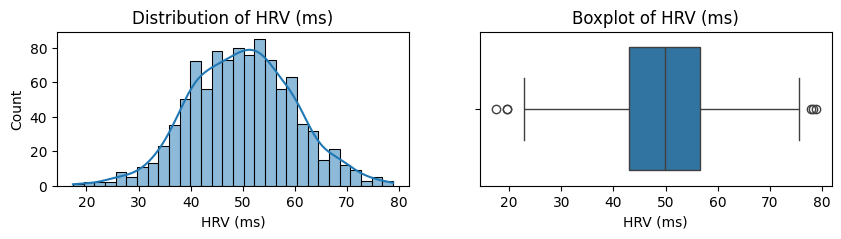

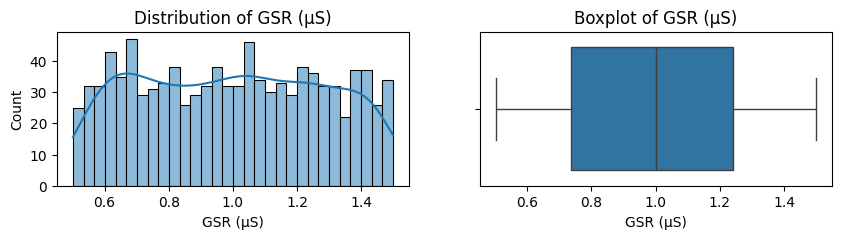

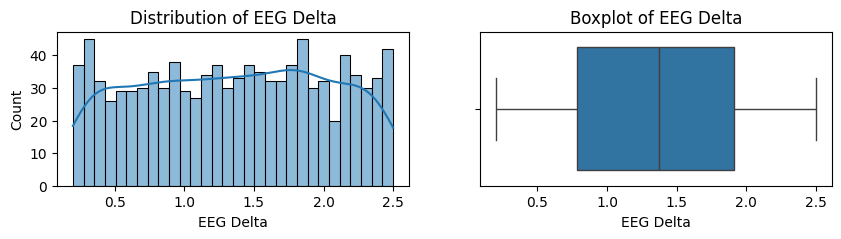

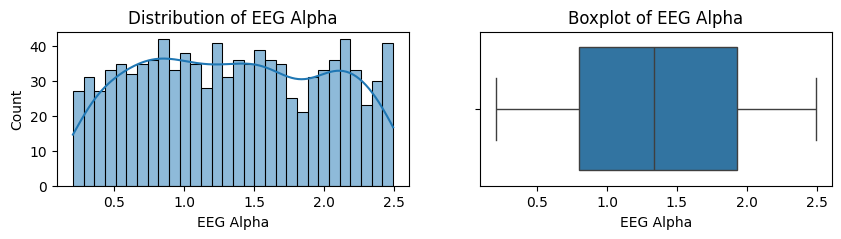

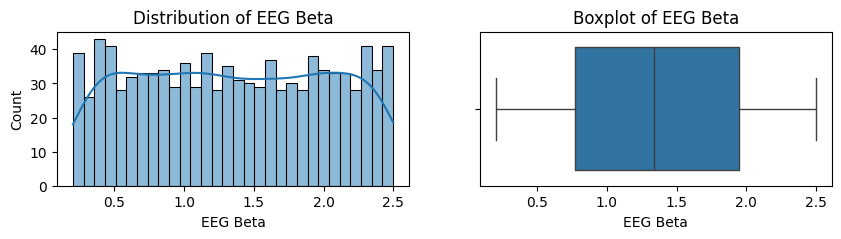

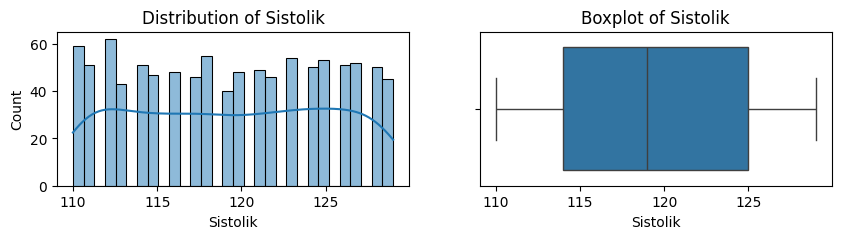

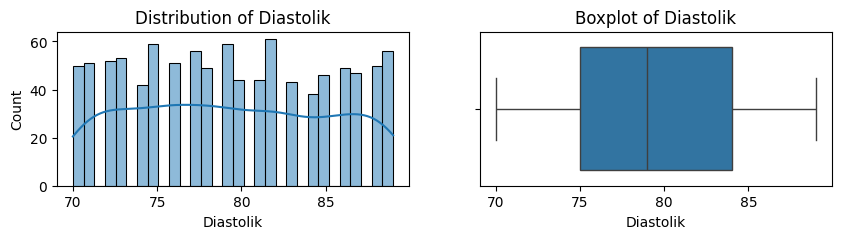

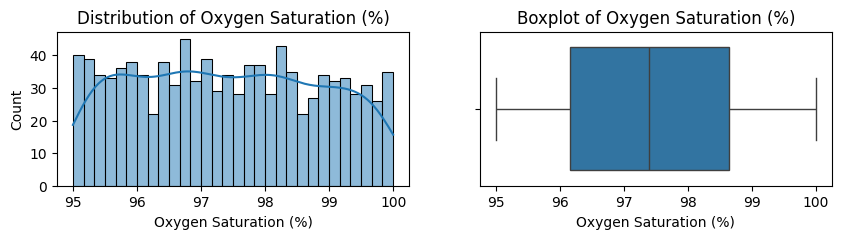

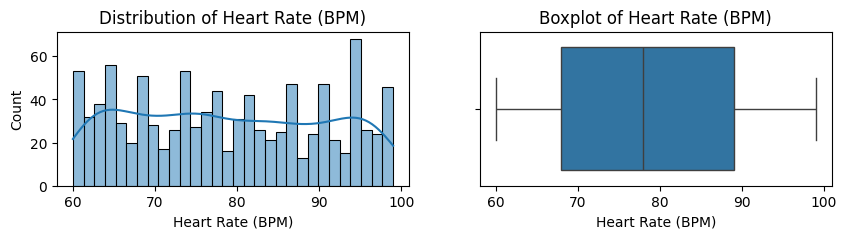

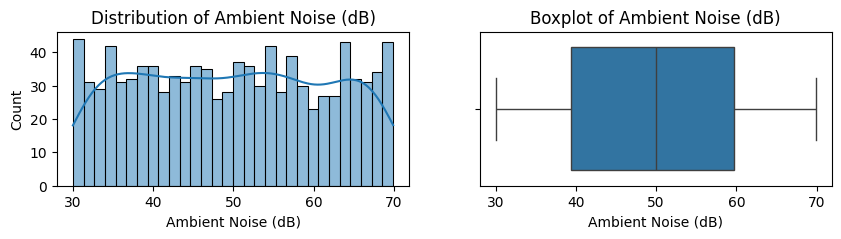

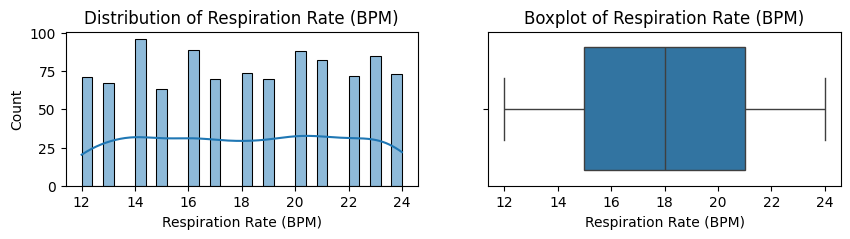

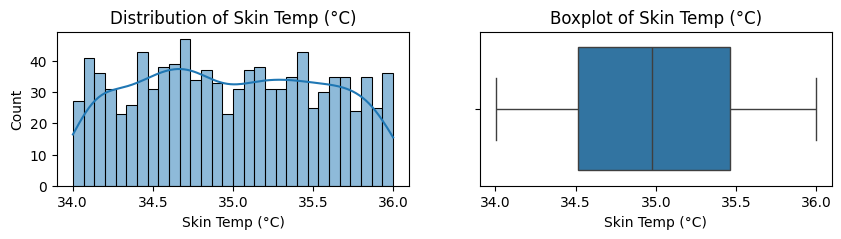

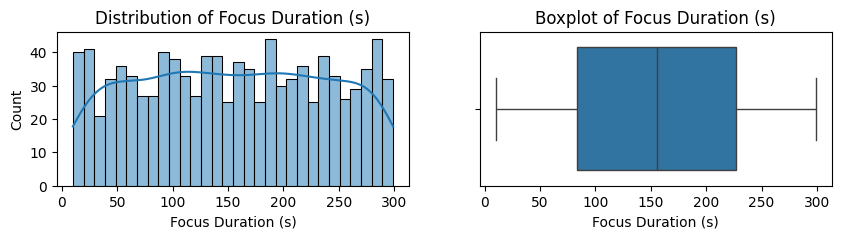

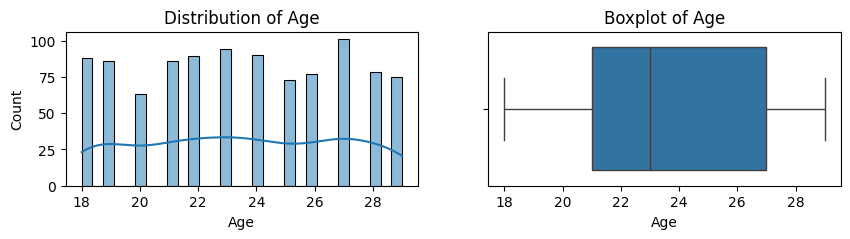

In [168]:
for variabel in list_kolom_numerik:
    plot(data_numerik, variabel)

In [169]:
data_analisis = data.drop(['EEG Power Bands', 'Sistolik', 'Diastolik', 'Gender'], axis=1)
data_analisis

,Psychological State,HRV (ms),GSR (μS),EEG Delta,EEG Alpha,EEG Beta,Blood Pressure Category,Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Cognitive Load,Mood State,Respiration Rate (BPM),Skin Temp (°C),Focus Duration (s),Task Type,Age,Educational Level,Study Major
0,Stressed,33.039739,1.031806,0.758365,1.423248,0.615770,Normal,98.433312,98,56.863054,Low,Anxious,21,34.566484,27,Exam,22,Postgraduate,Engineering
1,Stressed,49.914651,1.340983,0.552042,1.858066,0.376605,Prehipertensi,98.944505,70,45.343430,Low,Neutral,21,35.358593,282,Assignment,23,Undergraduate,Arts
2,Relaxed,67.894401,1.006014,1.026137,1.350493,2.308769,Prehipertensi,95.990753,91,50.029264,High,Sad,17,34.359495,50,Group Discussion,18,Postgraduate,Arts
3,Anxious,34.705373,0.849270,1.607572,1.661967,0.344134,Prehipertensi,98.173643,95,60.802104,Low,Neutral,12,34.802638,223,Exam,28,High School,Engineering
4,Stressed,52.896549,0.879084,1.055004,0.764332,1.074537,Prehipertensi,96.225051,65,40.696384,High,Anxious,14,35.869862,201,Group Discussion,24,High School,Engineering
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Stressed,73.056208,0.961572,1.417098,0.558137,2.057760,Prehipertensi,96.380705,66,39.395938,High,Neutral,22,34.710484,99,Assignment,24,Postgraduate,Science
996,Focused,60.489220,1.167583,0.436657,0.602476,1.601388,Prehipertensi,99.885334,75,31.074585,Moderate,Happy,12,34.636933,191,Exam,19,Undergraduate,Science
997,Relaxed,60.795800,0.996753,2.446697,0.403743,0.437608,Prehipertensi,99.851796,82,53.373199,Moderate,Happy,23,35.572915,103,Lecture,28,Postgraduate,Science
998,Stressed,42.321587,0.681139,2.232453,0.658990,1.095468,Prehipertensi,96.829325,84,32.758992,Moderate,Happy,19,35.295968,241,Assignment,26,Postgraduate,Engineering


## Features Selection

In [203]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier

# Step 1: Encode ordinal features using Label Encoding
ordinal_columns = ['Cognitive Load', 'Blood Pressure Category']
encoder = LabelEncoder()
for col in ordinal_columns:
    data_analisis[col + '_encoded'] = encoder.fit_transform(data_analisis[col])

# Step 2: One-Hot Encoding untuk fitur nominal
nominal_columns = ['Mood State', 'Task Type', 'Educational Level', 'Study Major']
data_encoded = pd.get_dummies(data_analisis, columns=nominal_columns, drop_first=True)

# Step 3: Encode target 'Psychological State' dengan Label Encoding
target_encoder = LabelEncoder()
data_encoded['Psychological State_encoded'] = target_encoder.fit_transform(data_analisis['Psychological State'])

# Step 4: Pisahkan fitur (X) dan target (y)
X = data_encoded.drop(columns=['Psychological State', 'Psychological State_encoded', 'Cognitive Load', 'Blood Pressure Category'])
y = data_encoded['Psychological State_encoded']

# Step 5: Menghitung Mutual Information untuk pemilihan fitur
mi_scores = mutual_info_classif(X, y, random_state=23)
mi_scores_dict = dict(zip(X.columns, mi_scores))

# Menampilkan skor Mutual Information
print("\nSkor Mutual Information:")
for feature, score in mi_scores_dict.items():
    print(f"{feature}: {score}")


Skor Mutual Information:
HRV (ms): 0.0
GSR (μS): 0.011013881206514142
EEG Delta: 0.023365070873168747
EEG Alpha: 0.0
EEG Beta: 0.03707427971505872
Oxygen Saturation (%): 0.006775463309098839
Heart Rate (BPM): 0.014829634444409212
Ambient Noise (dB): 0.008091773523753787
Respiration Rate (BPM): 0.0
Skin Temp (°C): 0.0
Focus Duration (s): 0.0
Age: 0.0
Cognitive Load_encoded: 0.022587573209889467
Blood Pressure Category_encoded: 0.012936578008059918
Mood State_Happy: 0.03553679775311469
Mood State_Neutral: 0.011124951018343765
Mood State_Sad: 0.0
Task Type_Exam: 0.0
Task Type_Group Discussion: 0.08599857971298741
Task Type_Lecture: 0.02802463204255856
Educational Level_Postgraduate: 0.0
Educational Level_Undergraduate: 0.05813079329925808
Study Major_Engineering: 0.0
Study Major_Science: 0.0


In [205]:
fitur_mi = ['GSR (μS)', 'EEG Delta', 'EEG Beta', 'Oxygen Saturation (%)', 'Heart Rate (BPM)', 'Ambient Noise (dB)', 'Cognitive Load_encoded', 'Mood State_Happy', 'Mood State_Neutral',
            'Task Type_Group Discussion', 'Task Type_Lecture', 'Educational Level_Undergraduate']
data_fitur_mi = data_encoded[fitur_mi]
data_fitur_mi

,GSR (μS),EEG Delta,EEG Beta,Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Cognitive Load_encoded,Mood State_Happy,Mood State_Neutral,Task Type_Group Discussion,Task Type_Lecture,Educational Level_Undergraduate
0,1.031806,0.758365,0.615770,98.433312,98,56.863054,1,False,False,False,False,False
1,1.340983,0.552042,0.376605,98.944505,70,45.343430,1,False,True,False,False,True
2,1.006014,1.026137,2.308769,95.990753,91,50.029264,0,False,False,True,False,False
3,0.849270,1.607572,0.344134,98.173643,95,60.802104,1,False,True,False,False,False
4,0.879084,1.055004,1.074537,96.225051,65,40.696384,0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.961572,1.417098,2.057760,96.380705,66,39.395938,0,False,True,False,False,False
996,1.167583,0.436657,1.601388,99.885334,75,31.074585,2,True,False,False,False,True
997,0.996753,2.446697,0.437608,99.851796,82,53.373199,2,True,False,False,True,False
998,0.681139,2.232453,1.095468,96.829325,84,32.758992,2,True,False,False,False,False


In [243]:
# Step 6: Terapkan Recursive Feature Elimination (RFE) dengan model RandomForest
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=7)
rfe.fit(data_fitur_mi, y)

# Menampilkan fitur yang dipilih oleh RFE
selected_features = data_fitur_mi.columns[rfe.support_]
print("Fitur yang dipilih oleh RFE:", selected_features)
print("Ranking Fitur yang dipilih RFE:", dict(zip(data_fitur_mi.columns, rfe.ranking_)))

Fitur yang dipilih oleh RFE: Index(['GSR (μS)', 'EEG Delta', 'EEG Beta', 'Oxygen Saturation (%)',
       'Heart Rate (BPM)', 'Ambient Noise (dB)', 'Cognitive Load_encoded'],
      dtype='object')
Ranking Fitur yang dipilih RFE: {'GSR (μS)': 1, 'EEG Delta': 1, 'EEG Beta': 1, 'Oxygen Saturation (%)': 1, 'Heart Rate (BPM)': 1, 'Ambient Noise (dB)': 1, 'Cognitive Load_encoded': 1, 'Mood State_Happy': 3, 'Mood State_Neutral': 6, 'Task Type_Group Discussion': 4, 'Task Type_Lecture': 5, 'Educational Level_Undergraduate': 2}


In [244]:
data_fitur = data_encoded[selected_features]
data_fitur = data_fitur.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

In [245]:
def calculate_vif_and_filter(X, threshold=10):
    while True:
        vif_data = pd.DataFrame()
        vif_data['Feature'] = X.columns
        vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        max_vif = vif_data['VIF'].max()
        if max_vif > threshold:
            excluded_feature = vif_data.loc[vif_data['VIF'].idxmax(), 'Feature']
            X = X.drop(columns=[excluded_feature])
            print(f"Removed {excluded_feature} (VIF: {max_vif:.4f})")
        else:
            break
    return X, vif_data

# Seleksi ulang berdasarkan VIF
calculate_vif_and_filter(data_fitur)

Removed Oxygen Saturation (%) (VIF: 89.6777)
Removed Heart Rate (BPM) (VIF: 20.6772)
Removed Ambient Noise (dB) (VIF: 10.9975)


(     GSR (μS)  EEG Delta  EEG Beta  Cognitive Load_encoded
 0    1.031806   0.758365  0.615770                       1
 1    1.340983   0.552042  0.376605                       1
 2    1.006014   1.026137  2.308769                       0
 3    0.849270   1.607572  0.344134                       1
 4    0.879084   1.055004  1.074537                       0
 ..        ...        ...       ...                     ...
 995  0.961572   1.417098  2.057760                       0
 996  1.167583   0.436657  1.601388                       2
 997  0.996753   2.446697  0.437608                       2
 998  0.681139   2.232453  1.095468                       2
 999  1.384472   0.637502  2.460246                       1
 
 [1000 rows x 4 columns],
                   Feature       VIF
 0                GSR (μS)  5.849955
 1               EEG Delta  4.101767
 2                EEG Beta  4.047773
 3  Cognitive Load_encoded  2.256228)

In [246]:
data_fitur

,GSR (μS),EEG Delta,EEG Beta,Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Cognitive Load_encoded
0,1.031806,0.758365,0.615770,98.433312,98,56.863054,1
1,1.340983,0.552042,0.376605,98.944505,70,45.343430,1
2,1.006014,1.026137,2.308769,95.990753,91,50.029264,0
3,0.849270,1.607572,0.344134,98.173643,95,60.802104,1
4,0.879084,1.055004,1.074537,96.225051,65,40.696384,0
...,...,...,...,...,...,...,...
995,0.961572,1.417098,2.057760,96.380705,66,39.395938,0
996,1.167583,0.436657,1.601388,99.885334,75,31.074585,2
997,0.996753,2.446697,0.437608,99.851796,82,53.373199,2
998,0.681139,2.232453,1.095468,96.829325,84,32.758992,2


In [249]:
data_target = data_encoded['Psychological State_encoded']
data_target

,Psychological State_encoded
0,3
1,3
2,2
3,0
4,3
...,...
995,3
996,1
997,2
998,3


## Klasifikasi

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Model Performance Table:


,Model,Accuracy,Sensitivity,Specificity,AUC
0,Decision Tree,0.242424,0.242288,0.747297,0.494793
1,Logistic Regression,0.269697,0.265645,0.755236,0.508512
2,Naive Bayes,0.248485,0.244175,0.747925,0.491027


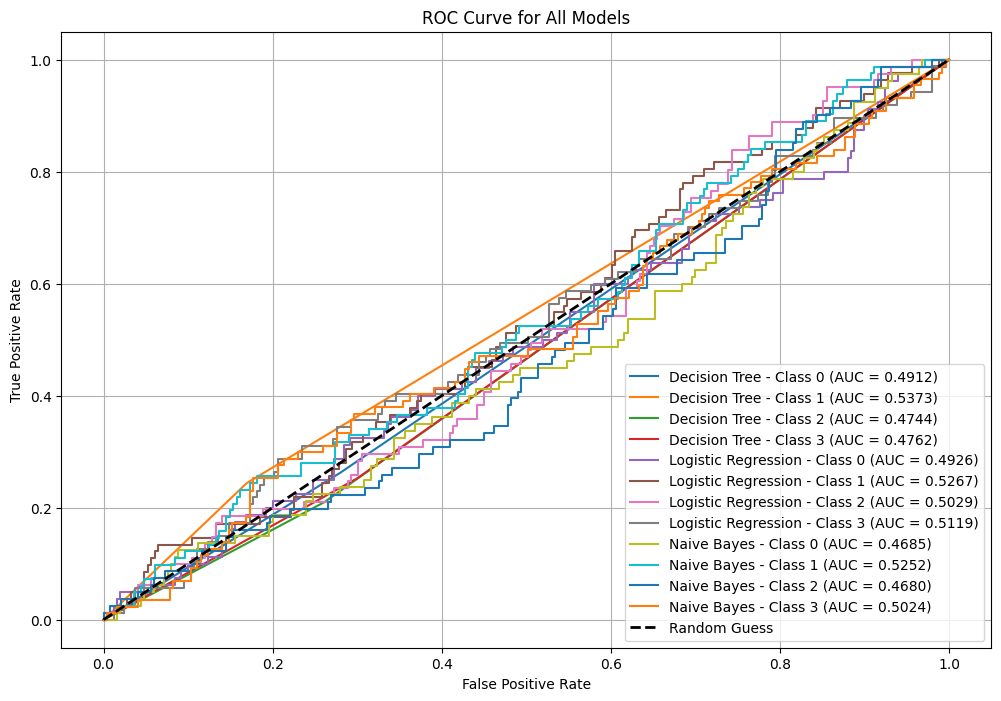

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


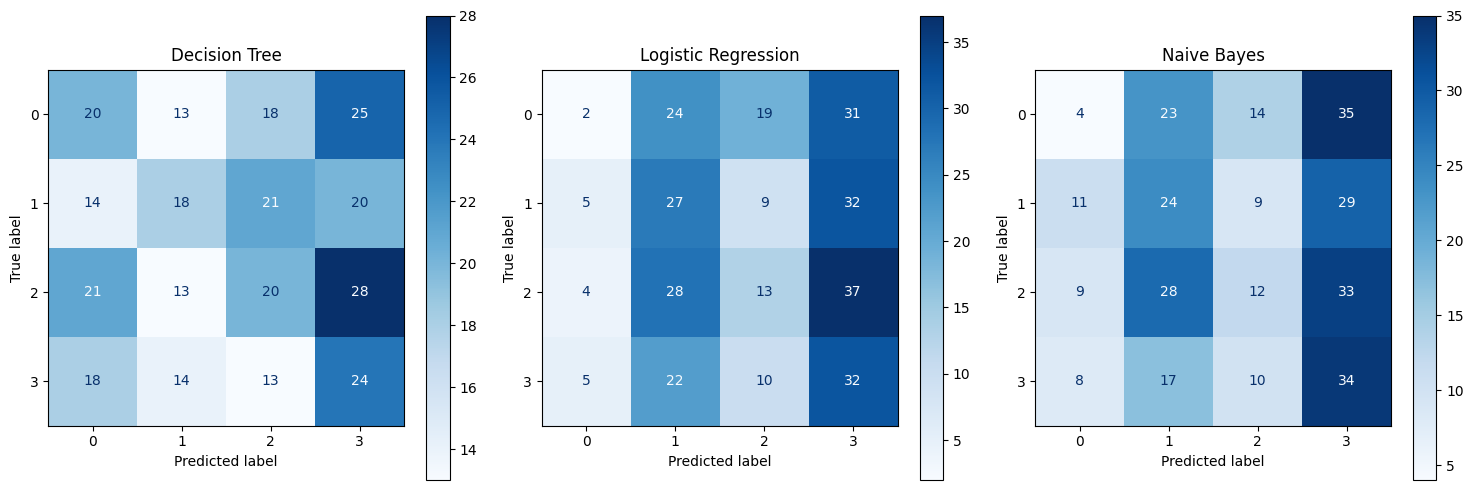

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay, accuracy_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Split data (example dataset assumed)
y = data_target  # Target variable
X = data_fitur

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=45),
    'Logistic Regression': LogisticRegression(random_state=45, max_iter=1000),
    'Naive Bayes': GaussianNB()
}

# Store results
results = {}
roc_curves = {}

# Perform repeat holdout cross-validation
n_repeats = 10
for model_name, model in models.items():
    accuracies = []
    sensitivities = []
    specificities = []
    aucs = []

    for _ in range(n_repeats):
        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

        # Train model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)
        # Get probabilities for each class (for multiclass)
        y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        # Metrics calculation
        accuracy = accuracy_score(y_test, y_pred)
        sensitivity = recall_score(y_test, y_pred, average='macro')  # Sensitivity = Recall

        # Handle multiclass confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Calculate specificity for each class
        specificities = []
        for i in range(len(conf_matrix)):
            tn = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
            fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
            fn = np.sum(conf_matrix[i, :]) - conf_matrix[i, i]
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
            specificities.append(specificity)

        # AUC score (using 'ovr' for multiclass)
        if y_proba is not None:
            auc_score = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
        else:
            auc_score = np.nan

        # Store fold results
        accuracies.append(accuracy)
        sensitivities.append(sensitivity)
        aucs.append(auc_score)

    # Aggregate metrics
    results[model_name] = {
        'Accuracy': np.mean(accuracies),
        'Sensitivity (Recall)': np.mean(sensitivities),
        'Specificity': np.mean(specificities),  # Mean specificity across classes
        'AUC': np.mean(aucs)
    }

    # Store ROC curve for each class in multiclass
    if y_proba is not None:
        # Binarize the output labels for multiclass ROC calculation
        y_test_bin = label_binarize(y_test, classes=np.unique(y))

        # Calculate ROC curve for each class
        fpr, tpr, roc_auc = {}, {}, {}
        for i in range(y_test_bin.shape[1]):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Store for plotting
        roc_curves[model_name] = (fpr, tpr, roc_auc)

# Prepare data for the table
metrics_df = pd.DataFrame.from_dict(results, orient='index').reset_index()
metrics_df.columns = ["Model", "Accuracy", "Sensitivity", "Specificity", "AUC"]

# Highlight the highest values in the table (excluding 'Model' column)
results_f = metrics_df.style.highlight_max(axis=0, subset=['Accuracy', 'Sensitivity', 'Specificity', 'AUC'], color='lightgreen')

# Display the metrics table
print("\nModel Performance Table:")
display(results_f)

# Plot individual ROC curves
plt.figure(figsize=(12, 8))
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    for i in range(len(fpr)):
        plt.plot(fpr[i], tpr[i], label=f'{model_name} - Class {i} (AUC = {roc_auc[i]:.4f})')

# Plot ROC curve details
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Plot confusion matrices
fig, axes = plt.subplots(1, len(models), figsize=(15, 5))
for ax, (model_name, model) in zip(axes, models.items()):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax, cmap='Blues', values_format='d')
    ax.set_title(model_name)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Model Performance Table:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Sensitivity,Specificity,AUC
0,Decision Tree,0.260000,0.260796,0.730540,0.506884
1,Logistic Regression,0.258000,0.260430,0.735611,0.494103
2,Naive Bayes,0.252000,0.253876,0.731911,0.482822


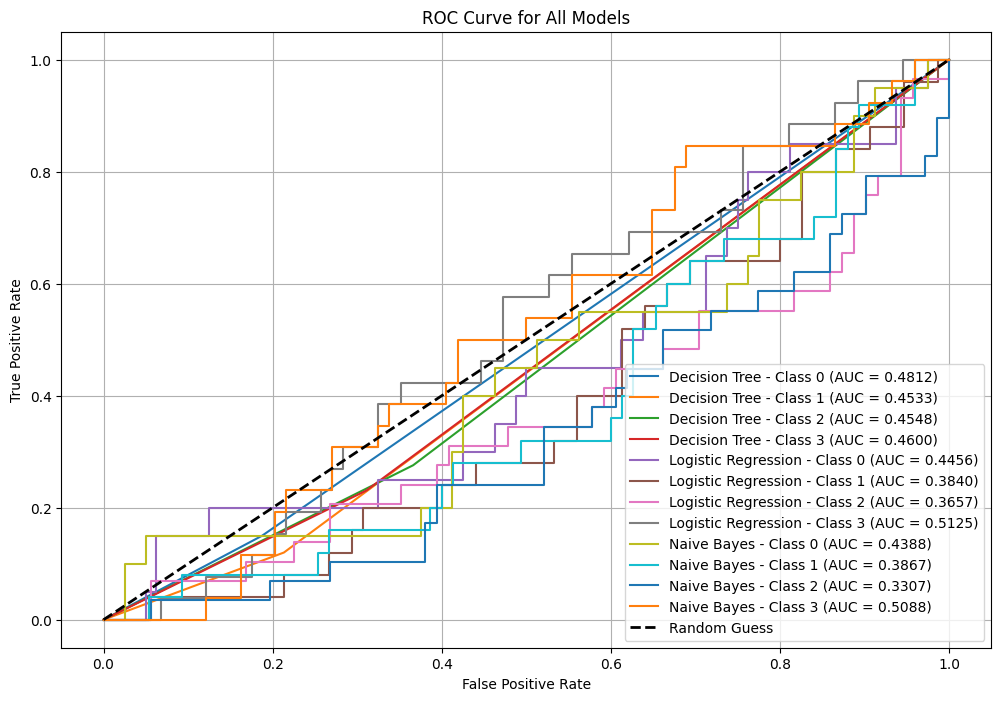

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


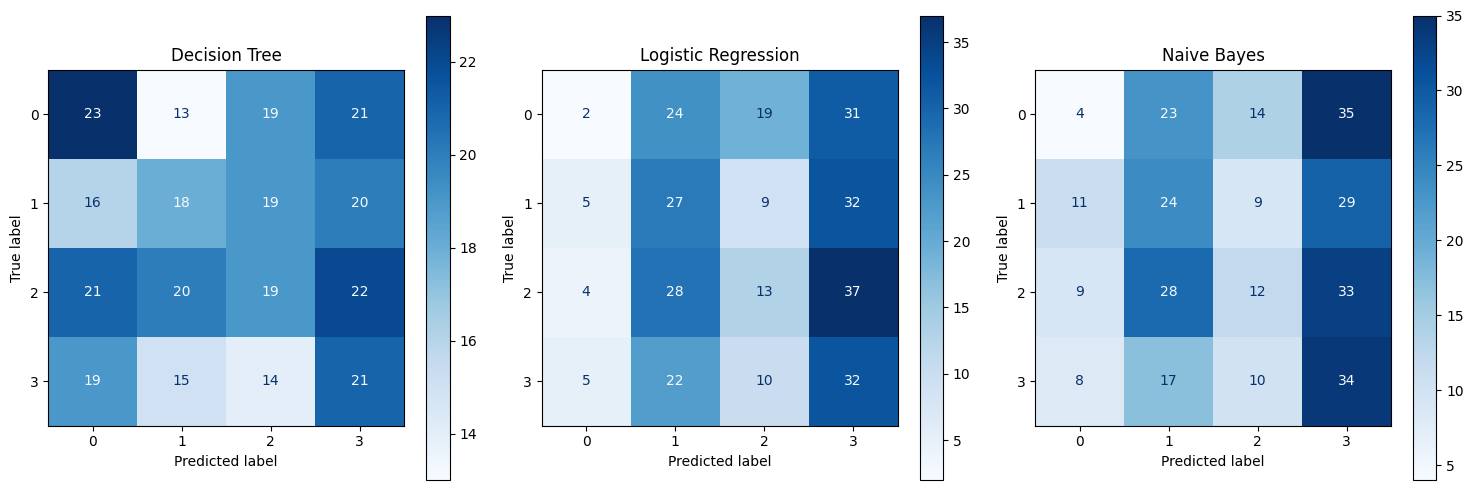

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay, accuracy_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Split data (example dataset assumed)
y = data_target  # Target variable
X = data_fitur

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes': GaussianNB()
}

# Store results
results = {}
roc_curves = {}

# Perform k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=100)
for model_name, model in models.items():
    accuracies = []
    sensitivities = []
    specificities = []
    aucs = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        # Metrics calculation
        accuracy = accuracy_score(y_test, y_pred)
        sensitivity = recall_score(y_test, y_pred, average='macro')  # Sensitivity = Recall (macro average)

        # Handle multiclass confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Calculate specificity for each class
        specificities = []
        for i in range(len(conf_matrix)):
            tn = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
            fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
            fn = np.sum(conf_matrix[i, :]) - conf_matrix[i, i]
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
            specificities.append(specificity)

        # AUC score (using 'ovr' for multiclass)
        if y_proba is not None:
            auc_score = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
        else:
            auc_score = np.nan

        # Store fold results
        accuracies.append(accuracy)
        sensitivities.append(sensitivity)
        aucs.append(auc_score)

    # Aggregate metrics
    results[model_name] = {
        'Accuracy': np.mean(accuracies),
        'Sensitivity (Recall)': np.mean(sensitivities),
        'Specificity': np.mean(specificities),  # Mean specificity across classes
        'AUC': np.mean(aucs)
    }

    # Store ROC curve for each class in multiclass
    if y_proba is not None:
        # Binarize the output labels for multiclass ROC calculation
        y_test_bin = label_binarize(y_test, classes=np.unique(y))

        # Calculate ROC curve for each class
        fpr, tpr, roc_auc = {}, {}, {}
        for i in range(y_test_bin.shape[1]):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Store for plotting
        roc_curves[model_name] = (fpr, tpr, roc_auc)

# Prepare data for the table
metrics_df = pd.DataFrame.from_dict(results, orient='index').reset_index()
metrics_df.columns = ["Model", "Accuracy", "Sensitivity", "Specificity", "AUC"]

# Highlight the highest values in the table (excluding 'Model' column)
results_f = metrics_df.style.highlight_max(axis=0, subset=['Accuracy', 'Sensitivity', 'Specificity', 'AUC'], color='lightgreen')

# Display the metrics table
print("\nModel Performance Table:")
display(results_f)

# Plot individual ROC curves
plt.figure(figsize=(12, 8))
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    for i in range(len(fpr)):
        plt.plot(fpr[i], tpr[i], label=f'{model_name} - Class {i} (AUC = {roc_auc[i]:.4f})')

# Plot ROC curve details
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Plot confusion matrices
fig, axes = plt.subplots(1, len(models), figsize=(15, 5))
for ax, (model_name, model) in zip(axes, models.items()):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax, cmap='Blues', values_format='d')
    ax.set_title(model_name)

plt.tight_layout()
plt.show()

## Kesimpulan

Hasil klasifikasi menggunakan 3 metode yaitu Decision Tree, Regresi Logistik, dan Naive Bayes dengan melakukan training-testing menggunakan repeated holdout serta k-fold CV dengan nilai pengulangan 10 didapatkan pada masing-masing metode traning-testing didapatkan hasil yang berbeda dimana hasil dari repeated holdout didapatkan hasil AUC yang lebih baik dengan metode klasifikasi Regresi Logistik sementara hasil dari k-fold CV didapatkan hasil AUC yang lebih baik dengan metode klasifikasi Decision Tree. Hal lain yang bisa dilihat yaitu dari matriks prediksi dan true value menunjukkan hasil yang tidak terlalu akurat. Nilai AUC didapatkan rendah serta grafik ROC juga menandakan model kurang bagus, hal ini karena variabel yang digunakan banyak yang memiliki korelasi satu sama lain sehingga model yang baik cukup susah didapatkan dengan variabel-variabel yang ada.